<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-pandas,-matplotlib,-and-seaborn,-and-the-Covid-case-and-NLS-data" data-toc-modified-id="Load-pandas,-matplotlib,-and-seaborn,-and-the-Covid-case-and-NLS-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load pandas, matplotlib, and seaborn, and the Covid case and NLS data</a></span></li><li><span><a href="#Do-a-violin-plot-of-the-SAT-verbal-score" data-toc-modified-id="Do-a-violin-plot-of-the-SAT-verbal-score-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Do a violin plot of the SAT verbal score</a></span></li><li><span><a href="#Get-some-descriptives-for-weeks-worked" data-toc-modified-id="Get-some-descriptives-for-weeks-worked-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Get some descriptives for weeks worked</a></span></li><li><span><a href="#Show-weeks-worked-for-2016-and-2017" data-toc-modified-id="Show-weeks-worked-for-2016-and-2017-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Show weeks worked for 2016 and 2017</a></span></li><li><span><a href="#Do-a-violin-plot-of-wage-income-by-gender-and-marital-status" data-toc-modified-id="Do-a-violin-plot-of-wage-income-by-gender-and-marital-status-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Do a violin plot of wage income by gender and marital status</a></span></li></ul></div>

# Load pandas, matplotlib, and seaborn, and the Covid case and NLS data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# pd.set_option('display.width', 80)
# pd.set_option('display.max_columns', 7)
# pd.set_option('display.max_rows', 200)
# pd.options.display.float_format = '{:,.0f}'.format

In [3]:
import watermark
%load_ext watermark

%watermark -n -i -iv

watermark : 2.1.0
seaborn   : 0.11.1
numpy     : 1.19.2
json      : 2.0.9
matplotlib: 3.3.2
pandas    : 1.2.1



In [4]:
nls97 = pd.read_csv('data/nls97.csv')
nls97.set_index('personid', inplace=True)

In [5]:
covidtotals = pd.read_csv('data/covidtotals.csv', parse_dates=['lastdate'])
covidtotals.set_index('iso_code', inplace=True)

# Do a violin plot of the SAT verbal score

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


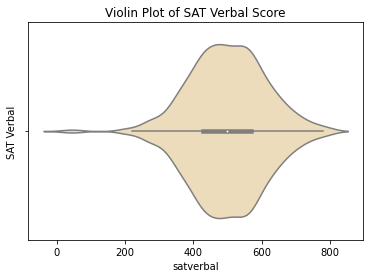

In [6]:
sns.violinplot(nls97['satverbal'], color='wheat', orient='v')
plt.title('Violin Plot of SAT Verbal Score')
plt.ylabel('SAT Verbal')
# plt.text(0.08, 780, 'outlier threshold', horizontalalignment='center', size='x-small')
# plt.text(0.065, nls97['satverbal'].quantile(0.75), '3rd quartile', horizontalalignment='center', size='x-small')
# plt.text(0.05, nls97['satverbal'].median(), 'Median', horizontalalignment='center', size='x-small')
# plt.text(0.065, nls97['satverbal'].quantile(0.25), '1st quartile', horizontalalignment='center', size='x-small')
# plt.text(0.08, 210, 'outlier threshold', horizontalalignment='center', size='x-small')
# plt.text(-0.4, 500, 'frequency', horizontalalignment='center', size='x-small')
plt.show()

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


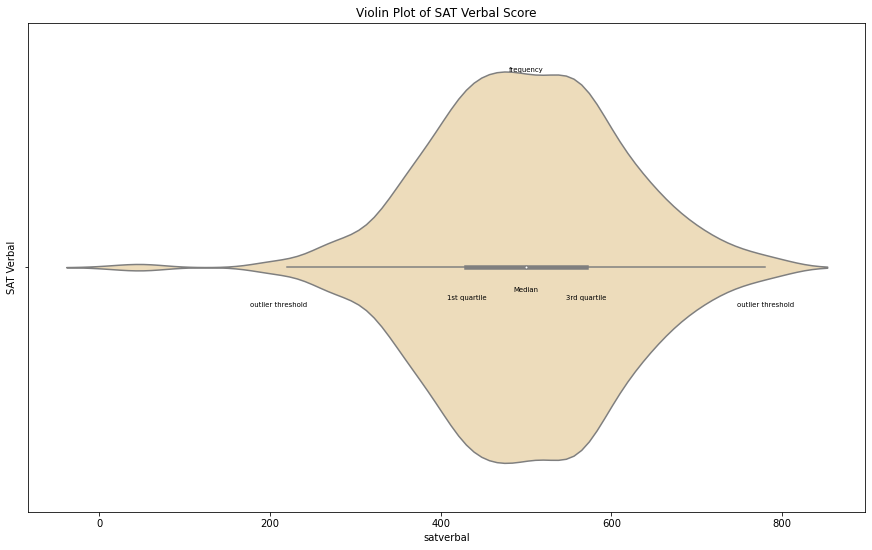

In [7]:
# Orient 'v' not working
plt.figure(figsize=(15, 9))
sns.violinplot(nls97['satverbal'], color='wheat')
plt.title('Violin Plot of SAT Verbal Score')
plt.ylabel('SAT Verbal')
plt.text(780,
         0.08,
         'outlier threshold',
         horizontalalignment='center',
         size='x-small')
plt.text(nls97['satverbal'].quantile(0.75),
         0.065,
         '3rd quartile',
         horizontalalignment='center',
         size='x-small')
plt.text(nls97['satverbal'].median(),
         0.05,
         'Median',
         horizontalalignment='center',
         size='x-small')
plt.text(nls97['satverbal'].quantile(0.25),
         0.065,
         '1st quartile',
         horizontalalignment='center',
         size='x-small')
plt.text(210,
         0.08,
         'outlier threshold',
         horizontalalignment='center',
         size='x-small')
plt.text(500, -0.4, 'frequency', horizontalalignment='center', size='x-small')
plt.show()

# Get some descriptives for weeks worked

In [8]:
nls97.loc[:, ['weeksworked16', 'weeksworked17']].describe()

,weeksworked16,weeksworked17
count,7068.000000,6670.000000
mean,39.127476,39.016642
std,21.336629,19.465974
min,0.000000,0.000000
25%,23.000000,37.000000
50%,53.000000,49.000000
75%,53.000000,52.000000
max,53.000000,52.000000


# Show weeks worked for 2016 and 2017

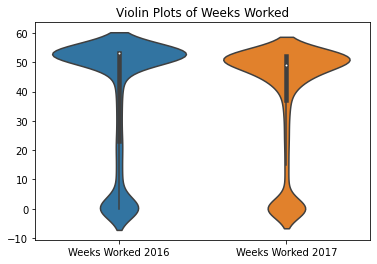

In [9]:
myplt = sns.violinplot(data=nls97.loc[:, ['weeksworked16', 'weeksworked17']])
myplt.set_title('Violin Plots of Weeks Worked')
myplt.set_xticklabels(['Weeks Worked 2016', 'Weeks Worked 2017'])
plt.show()

# Do a violin plot of wage income by gender and marital status

In [10]:
# First, create a collapsed marital status column. Specify gender for the x axis,
# salary for the y axis, and a new collapsed marital status column for hue. The hue
# parameter is used for grouping, which will be added to any grouping already used
# for the x axis. We also indicate scale="count" to generate violin plots sized
# according to the number of observations in each category

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


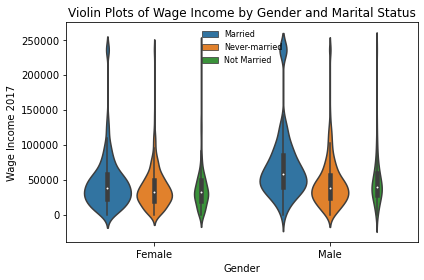

In [16]:
nls97['maritalstatuscollapsed'] = nls97['maritalstatus'].replace(
    ['Married', 'Never-married', 'Divorced', 'Separated', 'Widowed'],
    ['Married', 'Never-married', 'Not Married', 'Not Married', 'Not Married'])
sns.violinplot(nls97['gender'],
               nls97['wageincome'],
               hue=nls97['maritalstatuscollapsed'],
               scale='count')
plt.title('Violin Plots of Wage Income by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Wage Income 2017')
plt.legend(title='', loc='upper center', framealpha=0, fontsize=8)
plt.tight_layout()
plt.show()

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


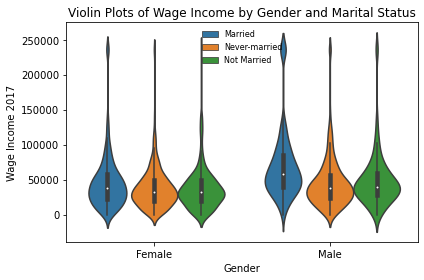

In [13]:
# Without scale = 'count'
nls97['maritalstatuscollapsed'] = nls97['maritalstatus'].replace(
    ['Married', 'Never-married', 'Divorced', 'Separated', 'Widowed'],
    ['Married', 'Never-married', 'Not Married', 'Not Married', 'Not Married'])
sns.violinplot(nls97['gender'],
               nls97['wageincome'],
               hue=nls97['maritalstatuscollapsed'])
plt.title('Violin Plots of Wage Income by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Wage Income 2017')
plt.legend(title='', loc='upper center', framealpha=0, fontsize=8)
plt.tight_layout()
plt.show()

D:\ProgramData\Anaconda3\envs\dsn\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


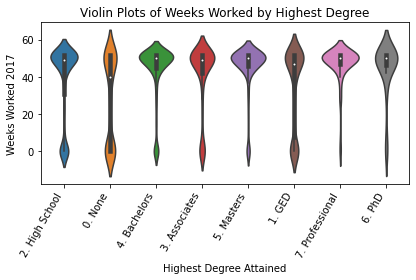

In [14]:
myplt = sns.violinplot('highestdegree',
                       'weeksworked17',
                       data=nls97,
                       rotation=40)
myplt.set_xticklabels(myplt.get_xticklabels(),
                      rotation=60,
                      horizontalalignment='right')
myplt.set_title('Violin Plots of Weeks Worked by Highest Degree')
myplt.set_xlabel('Highest Degree Attained')
myplt.set_ylabel('Weeks Worked 2017')
plt.tight_layout()
plt.show()